## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации, нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку.

#### Описание данных

*       title — название фильма;
* 		puNumber — номер прокатного удостоверения;
* 		show_start_date — дата премьеры фильма;
* 		type — тип фильма;
* 		film_studio — студия-производитель;
* 		production_country — страна-производитель;
* 		director — режиссёр;
* 		producer — продюсер;
* 		age_restriction — возрастная категория;
* 		refundable_support — объём возвратных средств государственной поддержки;
* 		nonrefundable_support — объём невозвратных средств государственной поддержки;
* 		financing_source — источник государственного финансирования;
* 		budget — общий бюджет фильма;
* 		ratings — рейтинг фильма на КиноПоиске;
* 		genres — жанр фильма.
* 		box_office — сборы в рублях.


### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.set_printoptions(threshold=np.inf)
pd.options.display.float_format = '{:,.1f}'.format
pd.options.mode.chained_assignment = None

In [54]:
try:
    df = pd.read_csv('mkrf_movies.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_movies.csv')

In [55]:
try:
    df1 = pd.read_csv('mkrf_shows.csv')
except:
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [56]:
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [57]:
df1.head()

,puNumber,box_office
0,111000113,"2,450.0"
1,111000115,"61,040.0"
2,111000116,"153,030,013.4"
3,111000117,"12,260,956.0"
4,111000118,"163,684,057.8"


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Приводим столбец с номером прокатного удостоверения к типу int и объединяем таблицы по этому столбцу.

In [60]:
df['puNumber'] = df['puNumber'].replace('нет', 0)
df['puNumber'] = df['puNumber'].astype('int')
data = df.merge(df1, on='puNumber', how='left')
data['puNumber'] = df['puNumber'].replace(0, None)
data = data.dropna(subset=['puNumber'])

In [61]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   object 
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [63]:
# Меняем данные на формат даты
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
#Приводим рейтинг к единиму формату и фереводим в тип float
data['ratings'] = data['ratings'].str.replace('%', '')
data['ratings'] = data['ratings'].astype('float').apply(lambda x: x/10 if x>10 else x)

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [64]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Пропуски присутствуют в следующих данных:
- 18 - film_studio - студия-производитель - Заменим на "Неизвестно".
- 2 - production_country - страна-производитель - Заменим на "Неизвестно".
- 9 - director - режиссёр - Заменим на "Неизвестно".
- 568 - producer - продюсер - Заменим на "Неизвестно".
- 7153 - refundable_support - объём возвратных средств государственной поддержки - Заминим на "0", так как небыло государственной поддержки.
- 7153 - nonrefundable_support - объём невозвратных средств государственной поддержки - Заминим на "0", так как небыло государственной поддержки.
- 7153 - budget - общий бюджет фильма - Оставим пропуски, так как фильм не мог быть снят без бюджета. Значит информация отсутствует.
- 7153 - financing_source - источник государственного финансирования - Заминим на "Отсутствует".
- 966 - ratings - рейтинг фильма на КиноПоиске - Оставим пропуски, информация отсутствует.
- 975 - genres - жанр фильма - Заменим на "Неизвестно".
- 4327 - box_office - сборы в рублях - Оставим пропуски, информация отсутствует.

In [65]:
fill_unknown_data = ['film_studio', 'production_country', 'director', 'producer', 'genres']
for v in fill_unknown_data:
    data[v] = data[v].fillna('Неизвестно')

fill_zero_data = ['refundable_support', 'nonrefundable_support']
for v in fill_zero_data:
    data[v] = data[v].fillna(0)

data['financing_source'] = data['financing_source'].fillna('Отсутствует')

In [66]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                 0
production_country          0
director                    0
producer                    0
age_restriction             0
refundable_support          0
nonrefundable_support       0
budget                   7153
financing_source            0
ratings                   966
genres                      0
box_office               4327
dtype: int64

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

In [67]:
data.duplicated().sum()

0

Полные дубликаты отсутствуют

In [68]:
data['title'].duplicated().sum()

714

Присутствуют дубликаты по названию фильмов

In [69]:
data[data['title'].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,6.4,"мелодрама,комедия",NaN
110,Гарри Поттер и орден Феникса /По роману Дж.К.Р...,121026316,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хэйдей Филмз",США - Великобритания,Дэвид Йетс,"Дэйвид Баррон, Дэйвид Хейман",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.7,"фэнтези,приключения,семейный","759,526.0"
113,Гарри Поттер и узник Азкабана /По роману Дж.К....,121026116,2016-09-23 12:00:00+00:00,Художественный,"Хэйдей Филмз, 1492 Пикчерз, Уорнер Бразерс",США,Альфонсо Куарон,Майкл Барната,«12+» - для детей старше 12 лет,0.0,0.0,NaN,Отсутствует,8.2,"фэнтези,приключения,семейный","1,125,302.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7369,Невиновен,111019319,2019-11-07 12:00:00+00:00,Художественный,"ООО ""Кавказфильм""",Россия,А.Емкужев,"А.Емкужев, А.Хуажева, ООО ""Корпорация Русская ...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.5,"триллер,детектив,криминал",NaN
7416,"Отель ""Гранд Будапешт""",121035119,2019-12-13 12:00:00+00:00,Художественный,"Американ Эмпирикал, Индиан Пэинтбраш, Скотт Ру...","Германия, США",Уэс Андерсен,"Уэс Андерсон, Джереми Доусон, Стивен Рейлс",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.9,"комедия,приключения,детектив",NaN
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.5,"триллер,драма","175,003.5"
7450,В тихом омуте,121036919,2019-12-09 12:00:00+00:00,Художественный,"Хэд Гир Филмз, Крео Филмз, Локал Хироу, Метрол...",США,Адам Рэндолл,Мэтт Уолдек,«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"триллер,криминал,детектив",NaN


In [70]:
data[data['title'] == 'Особо опасен']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.8,"фантастика,боевик,триллер",NaN


Видим, что название фильмов дублируются при разных датах показа. Возможно, это связано с тем, что фильмы показывались в разных кинотеатрах или в разное время.

In [71]:
data[data['title'] == 'Алекс и Эмма']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
40,Алекс и Эмма,221005015,2015-02-25 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,6.4,"мелодрама,комедия",NaN
41,Алекс и Эмма,221004616,2016-02-09 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,6.4,"мелодрама,комедия",NaN
4581,Алекс и Эмма,221156910,2010-12-17 12:00:00+00:00,Художественный,"Эскейп Артистс, Франчайз Пикчерз, Рейнер-Грэйс...",США,Роб Райнер,"Тодд Блэк, Элан Грейсман, Джереми Левен, Роб Р...",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,6.4,"мелодрама,комедия",NaN


Подтвердили вывод, посмотрев на дубликаты по названию фильмов и дате показа. Видим, что фильмы показывались в разное время.

In [72]:
data[data['title'] == 'Зверь']

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5988,Зверь,121013518,2018-07-05 12:00:00+00:00,Художественный,"Агиле Филмз, Бэ Эф И, Фильм Фонд, Филм Фо, Стр...",Великобритания,Майкл Пирс,"Кристиан Броуди, Лорен Дарк, Ивана МакКиннон",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.5,"триллер,драма","5,544,612.0"
7438,Зверь,121035919,2019-12-05 12:00:00+00:00,Художественный,Студио энд Нью,Южная Корея,Ли Джон-хо,"Чан Гён-ик, Чон Джи-хун, Пэк Кён сук",«18+» - запрещено для детей,0.0,0.0,NaN,Отсутствует,6.5,"триллер,драма","175,003.5"


Также, есть фильмы с одинаковым названием, но разными продюсерами, странами и другими данными. Скорее всего, это разные фильмы с одинаковым названием.

In [73]:
print(data['puNumber'].duplicated().sum())
data[data['puNumber'].duplicated()]

2


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.6,"драма,мелодрама,история",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,Отсутствует,6.8,"комедия,криминал",NaN


Есть два дубликата по номеру прокатного удостоверения.

In [74]:
data[data['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,Отсутствует,7.6,"драма,мелодрама,история",NaN


Дубликаты по номеру прокатного удостоверения не влияют на результаты исследования.

#### Шаг 2.4. Изучите категориальные значения

In [75]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [76]:
data['type'] = data['type'].str.strip()

In [77]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Убрали неявные дубликаты в столбце type, имевшие пробел вначале строки: Художественный, Анимационный.

#### Шаг 2.5. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [78]:
#Добавляем столбец year с годом выхода фильма
data['year'] = data['show_start_date'].dt.year

In [79]:
#Создаем два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.
data['main_director'] = data['director'].str.split(',').str[0]
data['main_genre'] = data['genres'].str.split(',').str[0]

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [80]:
#Определяем какую долю от общего бюджета фильма "budget" составляет государственная поддержка "refundable_support" и "nonrefundable_support". Добавляем столбец с этими данными с названием 'state_support'.
data['state_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

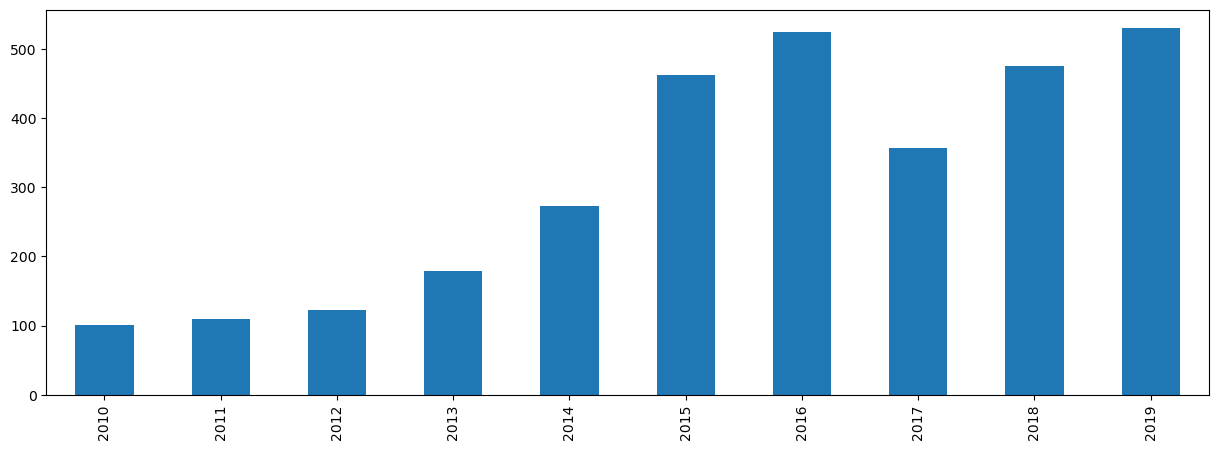

In [81]:
#Определяем количество фильмов выходивших каждый год. И построим гистограмму по порядку возрастания года.
data[data['box_office'] > 0]['year'].value_counts().sort_index().plot(kind='bar', figsize=(15, 5));

С 2010 года до 2016 шел стабильный рост количества фильмов в прокате. В 2017 году произошло падение, но с постоянным ростом до 2019 года.

In [82]:
#Определяем какую долю составлают фильмы с пропуском данных в столбце 'box_office' от общего количества фильмов.
data['box_office'].isna().sum() / data['title'].count()

0.5780895123580494

Имеется большое количество пропущенных значений в столбце сборов фильма. Почто 60%.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

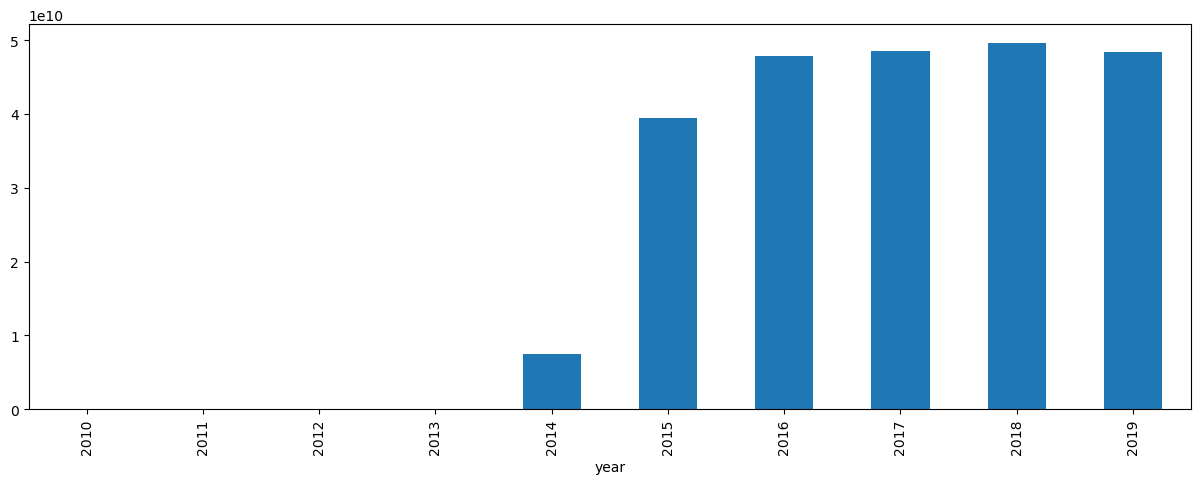

In [83]:
#Определяем сумарный бюджет фильмов по годам и строим график по порядку возрастания года.
data.groupby('year')['box_office'].sum().sort_index().plot(kind='bar', figsize=(15, 5));

С 2010 по 2014 информация о сборах минимальна. В 2016 году произошел резкий рост относительно 2017 и в дальнейшем имел примерно одинаковый уровень.

In [84]:
#Формируем сводную таблицу по годам выхода фильмов и определяем их количество и суммарный бюджет.
data.pivot_table(index='year', values=['title', 'box_office'], aggfunc={'title': 'count', 'box_office': ['sum', 'count']})


box_office                  title
          count              sum count
year                                  
2010        105      2,428,654.0   985
2011        109     14,102,765.0   622
2012        128      6,955,423.0   593
2013        184     29,799,706.2   630
2014        279  7,444,951,859.2   806
2015        465 39,497,365,196.4   705
2016        526 47,866,299,741.9   818
2017        357 48,563,707,217.5   505
2018        475 49,668,403,134.3   891
2019        530 48,425,708,779.6   930

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [85]:
#Формируем сводную таблицу и определяем среднюю и медианную сумму сборов для каждого года. 
#Построим график по порядку возрастания года по каждому из значений.
data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])

,mean,median
,box_office,box_office
year,,
2010,"23,130.0","1,700.0"
2011,"129,383.2","3,000.0"
2012,"54,339.2","5,660.0"
2013,"161,954.9","3,522.5"
2014,"26,684,415.3","18,160.0"
2015,"84,940,570.3","4,920,933.0"
2016,"91,000,569.9","3,846,679.4"
2017,"136,032,793.3","9,968,340.0"


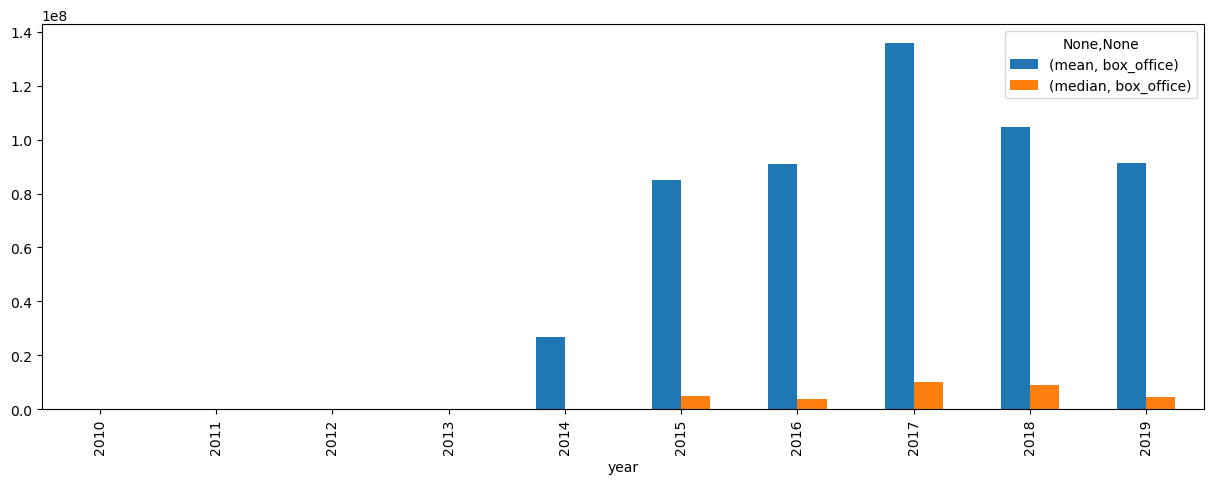

In [86]:
(
data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
    .sort_index()
    .plot(kind='bar', figsize=(15, 5))
);

- Видим, что данный график отличается от предыдущего и показывает, что с 2015 по 2017 года происходил рост с пиком в 2017 году и падение в 2018 и 2019 годах .
- Видим большое различие между средним и медианным показателями, что говорит нам о наличии небольшого количества фильмов с уникально большими сборами.
- Среднее значение более подверженно изменениям чем медианное.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

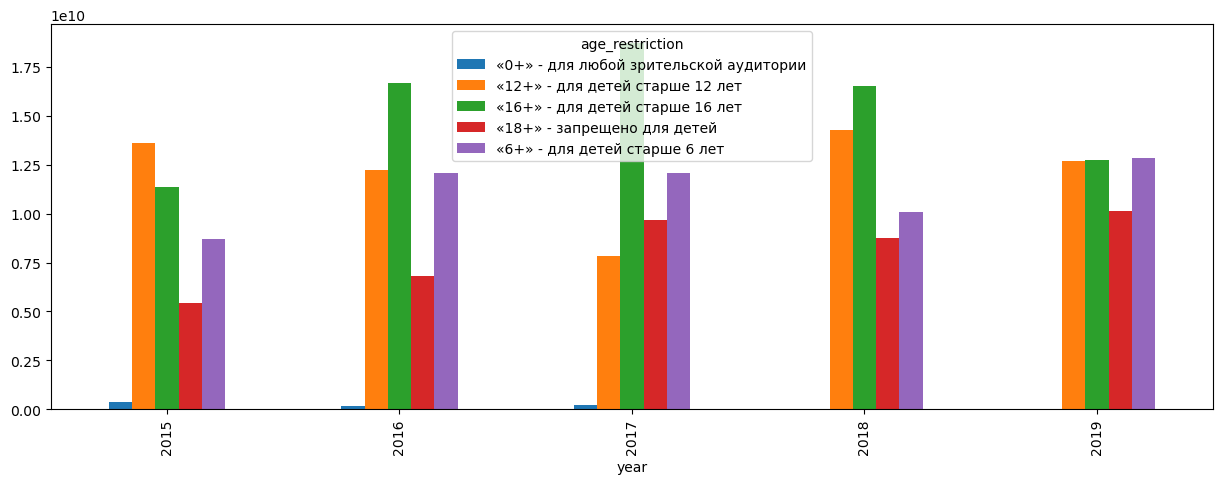

In [87]:
#Собираем сводную таблицу сгрупированную по столбцам 'year' и 'age_restriction'.
#Определяем сумму сборов для каждого года и возрастного рейтинга. 
#Берем данные с 2015 до 2019 года. И построим график по порядку возрастания года. 
(
data.query('2015 <= year <= 2019')
    .pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
    .sort_index().plot(kind='bar', figsize=(15, 5))
);

Независимо от года, фильмы с возрастным ограничением 0+ собирают меньше всего денег. Не считая 15 года, фильмы 16+ имеют самые большие сборы из года в год. В 2019 году все фильмы имеют схожие сборы, кроме 0+.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [88]:
#Собираем новый датафрейм где financing_source не равен 'Отсутствует'.
data_financing = data.query('financing_source != "Отсутствует"')

In [89]:
data_financing.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,state_support
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,"26,500,000.0","79,411,900.0",Министерство культуры,8.1,"драма,мелодрама","365,353.6",2013,А.Атанесян,драма,0.3
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,"26,000,000.0","37,142,857.0",Министерство культуры,NaN,Неизвестно,"28,140.0",2014,А.Якимчук,Неизвестно,0.7
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,"107,847,945.0","176,023,490.0",Фонд кино,5.3,"комедия,фантастика","19,957,031.5",2013,Р.Давлетьяров,комедия,0.6
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,"28,000,000.0","40,574,140.0",Министерство культуры,4.2,драма,"55,917.5",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.7
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,"25,000,000.0","40,015,122.0",Министерство культуры,6.4,драма,"232,100.0",2014,М.Угаров,драма,0.6


In [90]:
data_financing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7478
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   puNumber               332 non-null    object             
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               332 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

In [91]:
data_financing['payback'] = data_financing['box_office'] / data_financing['budget']

In [92]:
# Смотрим основные показатели
(
    data_financing[['refundable_support', 'nonrefundable_support', 'budget', 'box_office', 'state_support', 'payback']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,refundable_support,nonrefundable_support,budget,box_office,state_support,payback
count,332.00,332.00,332.00,318.00,332.00,318.00
min,0.00,0.00,0.00,"1,550.00",0.04,0.00
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79",inf,inf
median,0.00,"30,000,000.00","68,649,916.00","15,720,067.71",0.61,0.18


In [93]:
data_financing = data_financing.query('box_office < 1000000000')

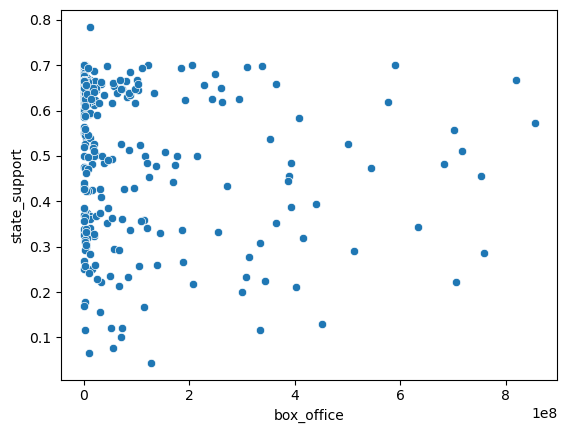

In [94]:
#Построим график рассеяния для суммы сборов и государственной поддержки.
sns.scatterplot(x='box_office', y='state_support', data=data_financing);

Объем гос.поддержки не влияет на сборы фильма в прокате.

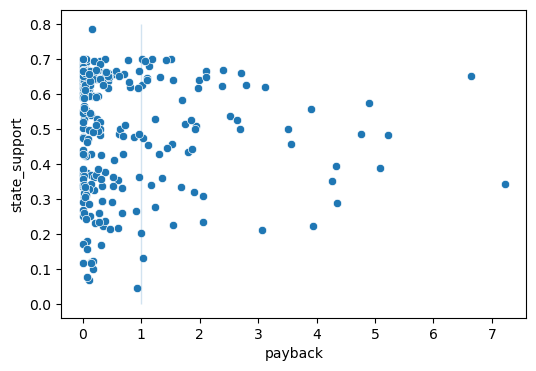

In [95]:
#Построим график рассеяния для окупаемости и государственной поддержки.
fig, ax = plt.subplots(figsize=(6, 4))
p1 = sns.scatterplot(data=data_financing, x='payback', y='state_support', ax=ax)
p2 = sns.lineplot(x=[1, 1], y=[0, 0.8], ax=ax)

In [96]:
payed_back = data_financing.query('payback >= 1')['title'].count()
not_payed_back = data_financing.query('payback < 1')['title'].count()
payback_percent = payed_back / (payed_back + not_payed_back)
print('Количество окупившихся фильмов:', payed_back)
print()
print('Количество не окупившихся фильмов:', not_payed_back)
print()
print('Процент окупившихся фильмов от общего голичества:', payback_percent)

Количество окупившихся фильмов: 76

Количество не окупившихся фильмов: 235

Процент окупившихся фильмов от общего голичества: 0.24437299035369775


Окупаемость фильмов с гос.поддержкой на уровне 20%.
На графике можем заметить небольшое увеличение количества окупившихся фильмов при большем финансировании, но и общее количество фильмов увеличивается.

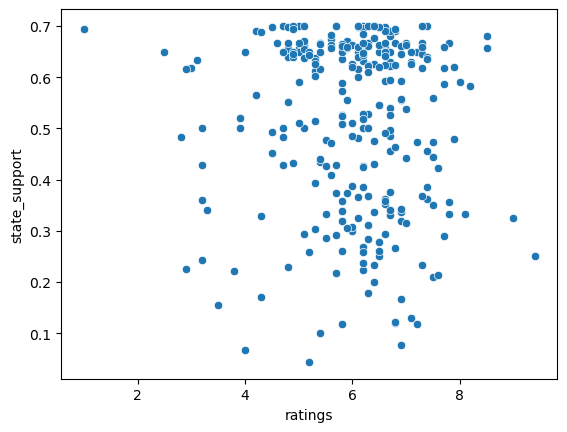

In [97]:
#Построим график рассеяния для рейтинга и государственной поддержки.
sns.scatterplot(x='ratings', y='state_support', data=data_financing);

Объем гос.поддержки никак не влияет на райтинг фильма.

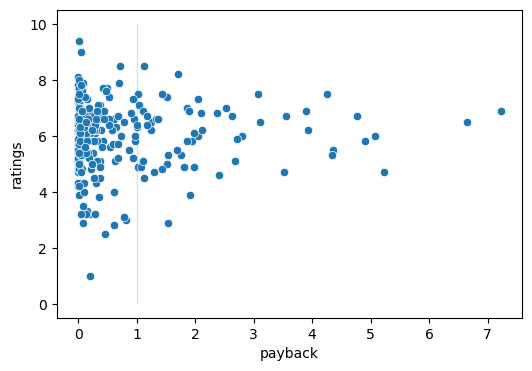

In [98]:
#Построим график рассеяния для рейтинга и окупаемости.
fig, ax = plt.subplots(figsize=(6, 4))
p1 = sns.scatterplot(data=data_financing, x='payback', y='ratings', ax=ax)
p2 = sns.lineplot(x=[1, 1], y=[0, 10], ax=ax)

Интересная закономерность: чаще всего окупаются фильмы с рейтингом от 5 до 8.

### Шаг 5. Напишите общий вывод

* С 2010 года до 2016 шел стабильный рост количества фильмов в прокате. 
* В 2017 году произошло падение количества показов, но с постоянным ростом до 2019 года.
* Имеется большое количество пропущенных значений в столбце сборов фильма. Почто 60%.
* С 2010 по 2014 информация о сборах минимальна. 
* В 2016 году произошел резкий рост сборов относительно 2017 и в дальнейшем имел примерно одинаковый уровень.
* Видим, что график средних и медианных сборов за год отличается от графика сумарных сборов и показывает, что с 2015 по 2017 года происходил рост с пиком в 2017 году и падение в 2018 и 2019 годах .
* Видим большое различие между средним и медианным показателями сборов, что говорит нам о наличии небольшого количества фильмов с уникально большими сборами.
* Среднее значение сборов более подверженно изменениям чем медианное.
* Независимо от года, фильмы с возрастным ограничением 0+ собирают меньше всего денег. Не считая 15 года, фильмы 16+ имеют самые большие сборы из года в год. В 2019 году все фильмы имеют схожие сборы, кроме 0+.
* Объем гос.поддержки не влияет на сборы фильма в прокате.
* Окупаемость фильмов с гос.поддержкой на уровне 20%.
* На графике можем заметить небольшое увеличение количества окупившихся фильмов при большем финансировании, но и общее количество фильмов увеличивается.
* Объем гос.поддержки никак не влияет на райтинг фильма.
* Интересная закономерность: чаще всего окупаются фильмы с рейтингом от 5 до 8.